In [1]:
import pandas as pd

In [2]:
# Obtaining population data
df_population = pd.read_csv("/content/TidyBrasilWorldBank.csv")
df_population.columns.tolist()

['Unnamed: 0',
 'Country Name',
 'Country Code',
 'Year',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Access to clean fuels and technologies for cooking (% of population)',
 'Access to clean fuels and technologies for cooking, rural (% of rural population)',
 'Access to clean fuels and technologies for cooking, urban (% of urban population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of p

In [3]:
# Counting the number of columns
print(len(df_population.columns))

1390


# Testing to find the average for GDP

In [4]:
gdp_columns_analysis = ["GDP per person employed (constant 2021 PPP $)", "GDP per capita, PPP (constant 2021 international $)",
                        "GDP, PPP (constant 2021 international $)", "GDP (constant 2015 US$)", "GDP, PPP (current international $)",
                        "GDP: linked series (current LCU)", "GDP per capita, PPP (current international $)", "GDP per capita (current LCU)",
                        "GDP per capita (constant LCU)", "GDP per capita (current US$)", "GDP (constant LCU)", "GDP (current LCU)"]

In [5]:
store_gdp_col_df = df_population[gdp_columns_analysis].copy()

In [6]:
correlation_matrix_gdp = store_gdp_col_df.corr()

# Format the correlation matrix with precision using applymap
styled_corr_matrix = correlation_matrix_gdp.style.background_gradient(cmap='coolwarm')
styled_corr_matrix = correlation_matrix_gdp.applymap(lambda x: '{:.2f}'.format(x))

# Display the styled correrlation matrix
styled_corr_matrix

<ipython-input-6-6689876c5c54>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  styled_corr_matrix = correlation_matrix_gdp.applymap(lambda x: '{:.2f}'.format(x))


,GDP per person employed (constant 2021 PPP $),"GDP per capita, PPP (constant 2021 international $)","GDP, PPP (constant 2021 international $)",GDP (constant 2015 US$),"GDP, PPP (current international $)",GDP: linked series (current LCU),"GDP per capita, PPP (current international $)",GDP per capita (current LCU),GDP per capita (constant LCU),GDP per capita (current US$),GDP (constant LCU),GDP (current LCU)
GDP per person employed (constant 2021 PPP $),1.00,0.97,0.96,0.96,0.91,0.85,0.91,0.87,0.97,0.93,0.96,0.85
"GDP per capita, PPP (constant 2021 international $)",0.97,1.00,0.99,0.99,0.94,0.86,0.95,0.88,1.00,0.94,0.99,0.86
"GDP, PPP (constant 2021 international $)",0.96,0.99,1.00,1.00,0.97,0.92,0.97,0.93,0.99,0.90,1.00,0.92
GDP (constant 2015 US$),0.96,0.99,1.00,1.00,0.97,0.92,0.97,0.86,0.97,0.90,1.00,0.84
"GDP, PPP (current international $)",0.91,0.94,0.97,0.97,1.00,0.98,1.00,0.98,0.94,0.81,0.97,0.98
GDP: linked series (current LCU),0.85,0.86,0.92,0.92,0.98,1.00,0.97,1.00,0.86,0.72,0.92,1.00
"GDP per capita, PPP (current international $)",0.91,0.95,0.97,0.97,1.00,0.97,1.00,0.97,0.95,0.83,0.97,0.97
GDP per capita (current LCU),0.87,0.88,0.93,0.86,0.98,1.00,0.97,1.00,0.76,0.75,0.86,1.00
GDP per capita (constant LCU),0.97,1.00,0.99,0.97,0.94,0.86,0.95,0.76,1.00,0.95,0.97,0.75
GDP per capita (current US$),0.93,0.94,0.90,0.90,0.81,0.72,0.83,0.75,0.95,1.00,0.90,0.73


In [7]:
store_gdp_col_df['Average_GDP'] = store_gdp_col_df.mean(axis=1)
print(store_gdp_col_df[['Average_GDP']])  # Display the Average_GDP column

     Average_GDP
0   1.236913e+11
1   1.343287e+11
2   1.431944e+11
3   1.440536e+11
4   1.489514e+11
..           ...
59  2.318459e+12
60  2.330857e+12
61  2.637553e+12
62  2.872626e+12
63  3.049777e+12

[64 rows x 1 columns]


In [8]:
# Retrieve all columns with 'GDP' in their names
columns_with_gdp = df_population.columns[df_population.columns.str.contains('% of GDP', case=False)]

In [9]:
# Create a new DataFrame with only the columns containing 'GDP'
gdp_df = df_population[columns_with_gdp]

# # Display the first few rows of the new DataFrame
# print(gdp_df)

In [10]:
gdp_df['Average_GDP'] = gdp_df.mean(axis=1)
print(gdp_df[['Average_GDP']])  # Display the Average_GDP column

    Average_GDP
0     25.400297
1     25.338172
2     27.623987
3     27.563186
4     27.011249
..          ...
59    23.396906
60    25.105838
61    25.926050
62    30.417110
63    31.560076

[64 rows x 1 columns]


<ipython-input-10-fd1d29beb7b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['Average_GDP'] = gdp_df.mean(axis=1)


In [11]:
new_df = pd.DataFrame({'Year': df_population['Year'], 'Average_GDP': gdp_df['Average_GDP']})
print(new_df)  # Display the new DataFrame

    Year  Average_GDP
0   1960    25.400297
1   1961    25.338172
2   1962    27.623987
3   1963    27.563186
4   1964    27.011249
..   ...          ...
59  2019    23.396906
60  2020    25.105838
61  2021    25.926050
62  2022    30.417110
63  2023    31.560076

[64 rows x 2 columns]


## CO2 emission

In [13]:
co2_emission_data = pd.read_csv('/content/treecover_loss__ha.csv')

In [14]:
co2_emission_data.head()

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,BRA,2001,2.746362e+06,1.194228e+09
1,BRA,2002,3.507049e+06,1.624101e+09
2,BRA,2003,3.248527e+06,1.488845e+09
3,BRA,2004,3.848771e+06,1.887604e+09
4,BRA,2005,3.486563e+06,1.815445e+09


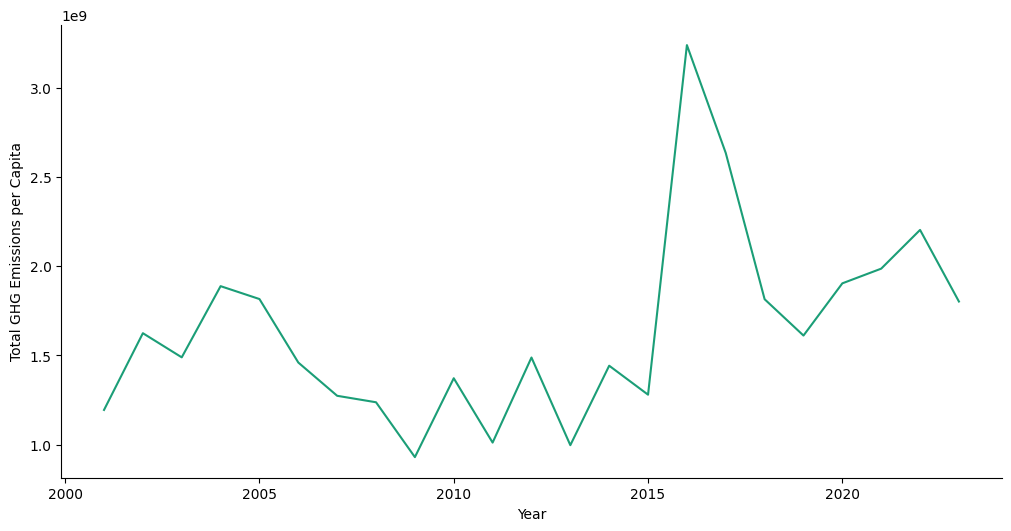

In [15]:
# @title umd_tree_cover_loss__year vs gfw_gross_emissions_co2e_all_gases__Mg

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['umd_tree_cover_loss__year']
  ys = series['gfw_gross_emissions_co2e_all_gases__Mg']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = co2_emission_data.sort_values('umd_tree_cover_loss__year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total GHG Emissions per Capita')

## Forest Area (% of Land Area)

In [16]:
certified_forest_data = pd.read_csv('/content/proportion-of-forest-area-certified-under-an-independently-verified-certification-scheme.csv')

In [17]:
certified_forest_data.head()

,Entity,Code,Year,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2005,0.0
2,Afghanistan,AFG,2010,0.0
3,Afghanistan,AFG,2015,0.0
4,Afghanistan,AFG,2016,0.0


In [18]:
brazil_forest_data = certified_forest_data[certified_forest_data['Entity'] == 'Brazil']
brazil_forest_data # To display the first few rows of the filtered data

,Entity,Code,Year,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT
341,Brazil,BRA,2000,638420.0
342,Brazil,BRA,2005,3119290.0
343,Brazil,BRA,2010,5852190.0
344,Brazil,BRA,2015,6751740.0
345,Brazil,BRA,2016,6397350.0
346,Brazil,BRA,2017,7305840.0
347,Brazil,BRA,2018,6905470.0
348,Brazil,BRA,2019,7504420.0
349,Brazil,BRA,2020,8608950.0
350,Brazil,BRA,2021,8749990.0


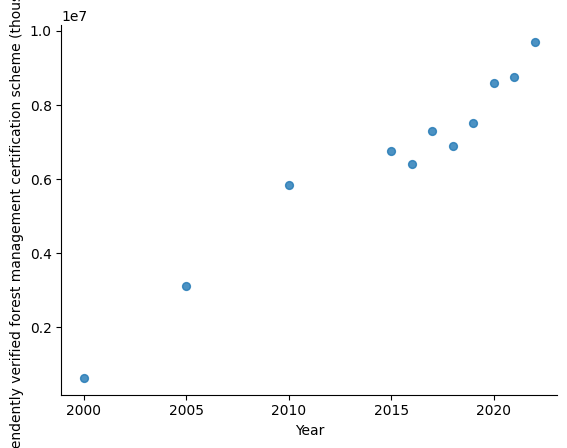

In [19]:
# @title Year vs 15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT

from matplotlib import pyplot as plt
brazil_forest_data.plot(kind='scatter', x='Year', y='15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# Select desired columns from co2_emission_data
co2_emission_subset = co2_emission_data[['iso', 'umd_tree_cover_loss__year', 'gfw_gross_emissions_co2e_all_gases__Mg']]

# Select desired columns from brazil_forest_data
brazil_forest_subset = brazil_forest_data[['Entity', 'Code', 'Year', '15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT']]

# Merge the subsets based on 'Year' and 'umd_tree_cover_loss__year'
brazil_merged_data = pd.merge(co2_emission_data, brazil_forest_data, left_on='umd_tree_cover_loss__year', right_on='Year', how='left')

In [21]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT
0,BRA,2001,2.746362e+06,1.194228e+09,NaN,NaN,NaN,NaN
1,BRA,2002,3.507049e+06,1.624101e+09,NaN,NaN,NaN,NaN
2,BRA,2003,3.248527e+06,1.488845e+09,NaN,NaN,NaN,NaN
3,BRA,2004,3.848771e+06,1.887604e+09,NaN,NaN,NaN,NaN
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0
5,BRA,2006,2.876805e+06,1.459737e+09,NaN,NaN,NaN,NaN
6,BRA,2007,2.621820e+06,1.273474e+09,NaN,NaN,NaN,NaN
7,BRA,2008,2.444308e+06,1.237236e+09,NaN,NaN,NaN,NaN
8,BRA,2009,1.817901e+06,9.299614e+08,NaN,NaN,NaN,NaN
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0


In [22]:
# Replace NaN values in 'Entity' column with 'brazil'
brazil_merged_data['Entity'] = brazil_merged_data['Entity'].fillna('Brazil')

brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,NaN
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,NaN
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,NaN
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,NaN
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,NaN
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,NaN
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,NaN
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,NaN
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0


In [23]:
# Replacing NaN value for the column (15.2.1 - Forest area...)
# Calculate the mean of the specified column, ignoring NaN values
mean_value = brazil_merged_data['15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT'].mean()

In [24]:
brazil_merged_data['15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT'] = brazil_merged_data['15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT'].fillna(mean_value)

In [25]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0


## Forest area data

In [26]:
brasil_forest_covered_data = pd.read_csv('/content/share-global-forest.csv')

In [27]:
brasil_forest_covered_data.head()

,Entity,Code,Year,Share of global forest area
0,Afghanistan,AFG,1990,0.028525
1,Afghanistan,AFG,1991,0.028578
2,Afghanistan,AFG,1992,0.028631
3,Afghanistan,AFG,1993,0.028684
4,Afghanistan,AFG,1994,0.028738


In [28]:
brazil_forest_area_data = brasil_forest_covered_data[brasil_forest_covered_data['Entity'] == 'Brazil']
brazil_forest_area_data # To display the first few rows of the filtered data

,Entity,Code,Year,Share of global forest area
922,Brazil,BRA,1990,13.900798
923,Brazil,BRA,1991,13.837152
924,Brazil,BRA,1992,13.773269
925,Brazil,BRA,1993,13.709149
926,Brazil,BRA,1994,13.644789
927,Brazil,BRA,1995,13.580190
928,Brazil,BRA,1996,13.515348
929,Brazil,BRA,1997,13.450264
930,Brazil,BRA,1998,13.384935
931,Brazil,BRA,1999,13.319360


In [29]:
# Select only the 'Year' and 'Share of global forest area' columns for merging
brazil_forest_area_subset = brazil_forest_area_data[['Year', 'Share of global forest area']]

In [30]:
brazil_merged_data = pd.merge(
    brazil_merged_data,
    brazil_forest_area_subset,
    left_on='umd_tree_cover_loss__year',
    right_on='Year',
    how='left')

In [31]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385


In [32]:
# Calculate the mean of the 'Share of global forest area' column, ignoring NaN values
mean_share = brazil_merged_data['Share of global forest area'].mean()

# Replace NaN values in the 'Share of global forest area' column with the mean value
brazil_merged_data['Share of global forest area'] = brazil_merged_data['Share of global forest area'].fillna(mean_share)

In [33]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385


## Red-List Index data

In [34]:
red_list_index = pd.read_csv('/content/red-list-index.csv')

In [35]:
red_list_index.head()

,Entity,Code,Year,15.5.1 - Red List Index - ER_RSK_LST
0,Afghanistan,AFG,1993,0.84
1,Afghanistan,AFG,1994,0.84
2,Afghanistan,AFG,1995,0.84
3,Afghanistan,AFG,1996,0.84
4,Afghanistan,AFG,1997,0.84


In [36]:
brazil_red_list_data = red_list_index[red_list_index['Entity'] == 'Brazil']
brazil_red_list_data # To display the first few rows of the filtered data

,Entity,Code,Year,15.5.1 - Red List Index - ER_RSK_LST
868,Brazil,BRA,1993,0.91
869,Brazil,BRA,1994,0.91
870,Brazil,BRA,1995,0.91
871,Brazil,BRA,1996,0.91
872,Brazil,BRA,1997,0.91
873,Brazil,BRA,1998,0.91
874,Brazil,BRA,1999,0.91
875,Brazil,BRA,2000,0.91
876,Brazil,BRA,2001,0.91
877,Brazil,BRA,2002,0.91


In [37]:
# Select only the 'Year' and 'Share of global forest area' columns for merging
brazil_red_list_data = brazil_red_list_data[['Year', '15.5.1 - Red List Index - ER_RSK_LST']]

In [38]:
test_data = pd.merge(
    brazil_merged_data,
    brazil_red_list_data,
    left_on='umd_tree_cover_loss__year',
    right_on='Year',
    how='left')

In [39]:
test_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91


In [40]:
# Merge the dataframes based on 'Year'
brazil_merged_data = pd.merge(
    brazil_merged_data,
    brazil_red_list_data,
    left_on='umd_tree_cover_loss__year',
    right_on='Year',
    how='left')

In [41]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91


## Merging the previously created GDP dataframe with the current indo_merged_data dataframe

In [42]:
new_df

,Year,Average_GDP
0,1960,25.400297
1,1961,25.338172
2,1962,27.623987
3,1963,27.563186
4,1964,27.011249
...,...,...
59,2019,23.396906
60,2020,25.105838
61,2021,25.926050
62,2022,30.417110


In [43]:
brazil_merged_data = pd.merge(
    brazil_merged_data,
    new_df,
    left_on='Year',
    right_on='Year',
    how='left')

In [44]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613


## Analysis for death from natural disasters

In [45]:
death_by_natural_disasters = pd.read_csv('/content/natural-disasters.csv')

In [46]:
death_by_natural_disasters.head()

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement
0,Afghanistan,1900,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1910,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1920,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1930,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1940,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
death_by_natural_disasters_data = death_by_natural_disasters[death_by_natural_disasters['Country name'] == 'Brazil']
death_by_natural_disasters_data # To display the first few rows of the filtered data

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement
338,Brazil,1900,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
339,Brazil,1910,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
340,Brazil,1920,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
341,Brazil,1930,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
342,Brazil,1940,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,30.0,30.0,0.0,0.0,0.058193,0.058193,0.0,0.019051,0.000000
343,Brazil,1950,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,33.7,33.7,0.0,6.6,0.049443,0.049443,0.0,0.008324,0.010210
344,Brazil,1960,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,275.3,264.0,0.0,78.6,0.310075,0.297747,0.0,0.004139,0.089051
345,Brazil,1970,0.0,0.0,1500000.0,0.0,1500000.0,0,0,2.300100e+08,...,0.000000,139.9,127.3,0.0,12.1,0.130792,0.119201,0.0,0.000878,0.011397
346,Brazil,1980,2.0,0.0,2075000.0,0.0,2075000.0,0,0,6.510000e+07,...,0.000000,195.4,187.8,0.0,14.3,0.140234,0.135005,0.0,0.008591,0.009776
347,Brazil,1990,0.0,0.0,1000000.0,0.0,1000000.0,0,0,1.220000e+07,...,0.000000,76.8,76.8,0.0,37.8,0.047188,0.047188,0.0,0.000178,0.023057


In [48]:
# Get columns containing 'death' (case-insensitive)
death_cols = death_by_natural_disasters_data.columns[death_by_natural_disasters_data.columns.str.contains('death', case=False)]

# Combine with 'Year' column
all_cols = death_cols.tolist() + ['Year']

# Select desired columns from the DataFrame
death_by_natural_disasters_data_brazil = death_by_natural_disasters_data[all_cols]

# Display the filtered DataFrame
death_by_natural_disasters_data_brazil

,Number of deaths from drought,Death rates from drought,Number of deaths from earthquakes,Death rates from earthquakes,Number of deaths from disasters,Death rates from disasters,Number of deaths from volcanic activity,Death rates from volcanic activity,Number of deaths from floods,Death rates from floods,...,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement,Year
338,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1900
339,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1910
340,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1920
341,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1930
342,0.0,0.000000,0.0,0.000000,30.0,0.058193,0.0,0.0,20.0,0.039141,...,30.0,30.0,0.0,0.0,0.058193,0.058193,0.0,0.019051,0.000000,1940
343,0.0,0.000000,0.0,0.000000,33.7,0.049443,0.0,0.0,21.2,0.030910,...,33.7,33.7,0.0,6.6,0.049443,0.049443,0.0,0.008324,0.010210,1950
344,0.0,0.000000,0.0,0.000000,275.3,0.310075,0.0,0.0,181.8,0.204557,...,275.3,264.0,0.0,78.6,0.310075,0.297747,0.0,0.004139,0.089051,1960
345,0.0,0.000000,0.0,0.000000,139.9,0.130792,0.0,0.0,114.2,0.106926,...,139.9,127.3,0.0,12.1,0.130792,0.119201,0.0,0.000878,0.011397,1970
346,2.0,0.001527,0.1,0.000072,195.5,0.140306,0.0,0.0,159.8,0.115039,...,195.4,187.8,0.0,14.3,0.140234,0.135005,0.0,0.008591,0.009776,1980
347,0.0,0.000000,0.0,0.000000,76.8,0.047188,0.0,0.0,38.6,0.023894,...,76.8,76.8,0.0,37.8,0.047188,0.047188,0.0,0.000178,0.023057,1990


In [49]:
# Assuming your dataframe is called death_by_natural_disasters_data_brazil

# Group by 'Year' and compute the mean of all columns, then calculate the row-wise mean
death_by_natural_disasters_data_brazil['mean_summary'] = death_by_natural_disasters_data_brazil.drop(columns='Year').mean(axis=1)

# Group by 'Year' and take the mean of the 'mean_summary' column
mean_summary_per_year = death_by_natural_disasters_data_brazil.groupby('Year')['mean_summary'].mean().reset_index()

# Display the result
print(mean_summary_per_year)


    Year  mean_summary
0   1900      0.000000
1   1910      0.000000
2   1920      0.000000
3   1930      0.000000
4   1940      4.294028
5   1950      4.821349
6   1960     38.968856
7   1970     19.553985
8   1980     27.669852
9   1990     10.978170
10  2000     14.965218
11  2010     24.955395
12  2020     28.127347


<ipython-input-49-a5667fdc1d87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_by_natural_disasters_data_brazil['mean_summary'] = death_by_natural_disasters_data_brazil.drop(columns='Year').mean(axis=1)


In [50]:
brazil_merged_data = pd.merge(
    brazil_merged_data,
    mean_summary_per_year,
    left_on='Year',
    right_on='Year',
    how='left')

In [51]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,mean_summary
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,NaN
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,NaN
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,NaN
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,NaN
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,NaN
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,NaN
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,NaN
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,NaN
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,NaN
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395


In [52]:
# Calculate the mean of the 'mean_summary' column, ignoring NaN values
mean_value = brazil_merged_data['mean_summary'].mean()

# Replace NaN values with the calculated mean
brazil_merged_data['mean_summary'] = brazil_merged_data['mean_summary'].fillna(mean_value)

In [53]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,mean_summary
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395


In [54]:
brazil_merged_data = brazil_merged_data.rename(columns={'mean_summary': 'Total_Death_Disaster'})

In [55]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395


# Analysis for population affected by natural disaster

In [56]:
# Get all columns
all_cols = death_by_natural_disasters_data.columns

In [57]:
# Exclude death columns using difference
excluded_cols = all_cols.difference(death_cols)

In [58]:
excluded_cols

Index(['Country name', 'Homelessness rate from disasters',
       'Homelessness rate from drought', 'Homelessness rate from earthquakes',
       'Homelessness rate from extreme temperatures',
       'Homelessness rate from floods', 'Homelessness rate from fog',
       'Homelessness rate from glacial lake outbursts',
       'Homelessness rate from landslides',
       'Homelessness rate from mass movements',
       ...
       'total_affected_rate_per_100k_wet_mass_movement',
       'total_affected_wet_mass_movement',
       'total_damages_all_disasters_excluding_earthquakes',
       'total_damages_all_disasters_excluding_extreme_temperature',
       'total_damages_glacial_lake_outburst_flood',
       'total_damages_pct_gdp_all_disasters_excluding_earthquakes',
       'total_damages_pct_gdp_all_disasters_excluding_extreme_temperature',
       'total_damages_pct_gdp_glacial_lake_outburst_flood',
       'total_damages_pct_gdp_wet_mass_movement',
       'total_damages_wet_mass_movement'],
  

In [59]:
# Add 'Year' column to the list of excluded columns
excluded_cols = excluded_cols.union(['Year'])

In [60]:
affected_by_natural_disasters = death_by_natural_disasters[excluded_cols]

In [61]:
affected_by_natural_disasters.head()

,Country name,Homelessness rate from disasters,Homelessness rate from drought,Homelessness rate from earthquakes,Homelessness rate from extreme temperatures,Homelessness rate from floods,Homelessness rate from fog,Homelessness rate from glacial lake outbursts,Homelessness rate from landslides,Homelessness rate from mass movements,...,total_affected_rate_per_100k_wet_mass_movement,total_affected_wet_mass_movement,total_damages_all_disasters_excluding_earthquakes,total_damages_all_disasters_excluding_extreme_temperature,total_damages_glacial_lake_outburst_flood,total_damages_pct_gdp_all_disasters_excluding_earthquakes,total_damages_pct_gdp_all_disasters_excluding_extreme_temperature,total_damages_pct_gdp_glacial_lake_outburst_flood,total_damages_pct_gdp_wet_mass_movement,total_damages_wet_mass_movement
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,Afghanistan,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,Afghanistan,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,Afghanistan,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [62]:
if 'Year' in affected_by_natural_disasters.columns:
  print("Year column is present in the dataframe")
else:
  print("Year column is not present in the dataframe")

Year column is present in the dataframe


In [63]:
affected_by_natural_disasters_brazil = affected_by_natural_disasters[affected_by_natural_disasters['Country name'] == 'Brazil']

In [64]:
affected_by_natural_disasters_brazil

,Country name,Homelessness rate from disasters,Homelessness rate from drought,Homelessness rate from earthquakes,Homelessness rate from extreme temperatures,Homelessness rate from floods,Homelessness rate from fog,Homelessness rate from glacial lake outbursts,Homelessness rate from landslides,Homelessness rate from mass movements,...,total_affected_rate_per_100k_wet_mass_movement,total_affected_wet_mass_movement,total_damages_all_disasters_excluding_earthquakes,total_damages_all_disasters_excluding_extreme_temperature,total_damages_glacial_lake_outburst_flood,total_damages_pct_gdp_all_disasters_excluding_earthquakes,total_damages_pct_gdp_all_disasters_excluding_extreme_temperature,total_damages_pct_gdp_glacial_lake_outburst_flood,total_damages_pct_gdp_wet_mass_movement,total_damages_wet_mass_movement
338,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
339,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
340,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
341,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
342,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
343,Brazil,0.000000,0.0,0.000000,0.0,0.000000,0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0,0.000000,0.000000,0.0,0.000000,0
344,Brazil,11.634361,0.0,0.000000,0.0,11.634361,0,NaN,NaN,0.0,...,459.879600,400000.0,9.951100e+06,9.951100e+06,0,0.000000,0.000000,0.0,0.000000,2700
345,Brazil,11.747950,0.0,0.000000,0.0,11.747950,0,NaN,NaN,0.0,...,0.000000,0.0,3.343200e+08,2.743200e+08,0,0.000000,0.000000,0.0,0.000000,0
346,Brazil,28.234446,0.0,0.572888,0.0,27.515340,0,NaN,NaN,0.0,...,5.273202,7804.0,4.293000e+08,4.298000e+08,0,0.000000,0.000000,0.0,0.000000,0
347,Brazil,7.100852,0.0,0.000000,0.0,6.877290,0,NaN,NaN,0.0,...,0.593726,977.4,7.348000e+07,2.598000e+07,0,0.012922,0.004226,0.0,0.000000,0


In [65]:
# Assuming 'Year' is already in the dataframe
# Select only numeric columns before calculating the mean
numeric_columns = affected_by_natural_disasters_brazil.select_dtypes(include='number').columns
mean_by_year_brazil = affected_by_natural_disasters_brazil.groupby('Year')[numeric_columns].mean()

# Instead of reset_index(drop=False), rename the existing 'Year' column to avoid the conflict
mean_by_year_brazil = mean_by_year_brazil.rename_axis(index='Year_index').reset_index()
# You can rename 'Year_index' to 'Year' if you like:
#mean_by_year_brazil = mean_by_year_brazil.rename(columns={'Year_index': 'Year'})

In [66]:
mean_by_year_brazil

,Year_index,Homelessness rate from disasters,Homelessness rate from drought,Homelessness rate from earthquakes,Homelessness rate from extreme temperatures,Homelessness rate from floods,Homelessness rate from fog,Homelessness rate from glacial lake outbursts,Homelessness rate from landslides,Homelessness rate from mass movements,...,total_affected_rate_per_100k_wet_mass_movement,total_affected_wet_mass_movement,total_damages_all_disasters_excluding_earthquakes,total_damages_all_disasters_excluding_extreme_temperature,total_damages_glacial_lake_outburst_flood,total_damages_pct_gdp_all_disasters_excluding_earthquakes,total_damages_pct_gdp_all_disasters_excluding_extreme_temperature,total_damages_pct_gdp_glacial_lake_outburst_flood,total_damages_pct_gdp_wet_mass_movement,total_damages_wet_mass_movement
0,1900,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,1910,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,1920,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1930,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1940,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
5,1950,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.0
6,1960,11.634361,0.0,0.000000,0.0,11.634361,0.0,NaN,NaN,0.0,...,459.879600,400000.0,9.951100e+06,9.951100e+06,0.0,0.000000,0.000000,0.0,0.000000,2700.0
7,1970,11.747950,0.0,0.000000,0.0,11.747950,0.0,NaN,NaN,0.0,...,0.000000,0.0,3.343200e+08,2.743200e+08,0.0,0.000000,0.000000,0.0,0.000000,0.0
8,1980,28.234446,0.0,0.572888,0.0,27.515340,0.0,NaN,NaN,0.0,...,5.273202,7804.0,4.293000e+08,4.298000e+08,0.0,0.000000,0.000000,0.0,0.000000,0.0
9,1990,7.100852,0.0,0.000000,0.0,6.877290,0.0,NaN,NaN,0.0,...,0.593726,977.4,7.348000e+07,2.598000e+07,0.0,0.012922,0.004226,0.0,0.000000,0.0


In [67]:
mean_by_year_brazil['Average_Affected_Brazil'] = mean_by_year_brazil.drop(columns='Year').mean(axis=1)

In [68]:
print(mean_by_year_brazil[['Year_index', 'Average_Affected_Brazil']])
# Changed int('Year') to 'Year_index' as 'Year' was renamed in a previous step.

    Year_index  Average_Affected_Brazil
0         1900             1.130952e+01
1         1910             1.136905e+01
2         1920             1.142857e+01
3         1930             1.148810e+01
4         1940             1.154762e+01
5         1950             1.160714e+01
6         1960             2.599500e+05
7         1970             7.688202e+06
8         1980             1.037184e+07
9         1990             1.566070e+06
10        2000             1.261567e+07
11        2010             2.358926e+07
12        2020             7.853614e+07


In [69]:
brazil_affect_disaster = mean_by_year_brazil[['Year_index', 'Average_Affected_Brazil']]

In [70]:
brazil_affect_disaster

,Year_index,Average_Affected_Brazil
0,1900,1.130952e+01
1,1910,1.136905e+01
2,1920,1.142857e+01
3,1930,1.148810e+01
4,1940,1.154762e+01
5,1950,1.160714e+01
6,1960,2.599500e+05
7,1970,7.688202e+06
8,1980,1.037184e+07
9,1990,1.566070e+06


In [71]:
brazil_merged_data = pd.merge(
    brazil_merged_data,
    brazil_affect_disaster,
    left_on='Year',
    right_on='Year_index',
    how='left')

In [72]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster,Year_index,Average_Affected_Brazil
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,NaN
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,NaN
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,NaN
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,NaN
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,NaN
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,NaN
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,NaN
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,NaN
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,NaN
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07


In [73]:
# Calculate the mean of the 'mean_summary' column, ignoring NaN values
mean_value = brazil_merged_data['Average_Affected_Brazil'].mean()

# Replace NaN values with the calculated mean
brazil_merged_data['Average_Affected_Brazil'] = brazil_merged_data['Average_Affected_Brazil'].fillna(mean_value)

In [74]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster,Year_index,Average_Affected_Brazil
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,5.106270e+07
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,5.106270e+07
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,5.106270e+07
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,5.106270e+07
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,5.106270e+07
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,5.106270e+07
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,5.106270e+07
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,5.106270e+07
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,5.106270e+07
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07


In [75]:
brazil_merged_data = brazil_merged_data.rename(columns={'Average_Affected_Brazil': 'Total_Affected_Disaster'})

In [76]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity,Code,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster,Year_index,Total_Affected_Disaster
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,5.106270e+07
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,5.106270e+07
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,5.106270e+07
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,5.106270e+07
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,5.106270e+07
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,5.106270e+07
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,5.106270e+07
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,5.106270e+07
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,5.106270e+07
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07


## KBA data analysis

In [77]:
KBA_data = pd.read_csv('/content/protected-terrestrial-biodiversity-sites.csv')

In [78]:
KBA_data.head()

,Entity,Code,Year,15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [79]:
KBA_data_brazil = KBA_data[KBA_data['Entity'] == 'Brazil']

In [80]:
KBA_data_brazil

,Entity,Code,Year,15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR
644,Brazil,BRA,2000,33.39
645,Brazil,BRA,2001,34.07
646,Brazil,BRA,2002,35.70
647,Brazil,BRA,2003,36.19
648,Brazil,BRA,2004,36.66
649,Brazil,BRA,2005,37.45
650,Brazil,BRA,2006,39.30
651,Brazil,BRA,2007,39.66
652,Brazil,BRA,2008,40.65
653,Brazil,BRA,2009,40.86


In [81]:
brazil_merged_data = pd.merge(
    brazil_merged_data,
    KBA_data_brazil,
    left_on='Year',
    right_on='Year',
    how='left')

In [82]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity_x,Code_x,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster,Year_index,Total_Affected_Disaster,Entity_y,Code_y,15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,5.106270e+07,Brazil,BRA,34.07
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,5.106270e+07,Brazil,BRA,35.70
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,5.106270e+07,Brazil,BRA,36.19
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,5.106270e+07,Brazil,BRA,36.66
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,5.106270e+07,Brazil,BRA,37.45
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,5.106270e+07,Brazil,BRA,39.30
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,5.106270e+07,Brazil,BRA,39.66
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,5.106270e+07,Brazil,BRA,40.65
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,5.106270e+07,Brazil,BRA,40.86
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07,Brazil,BRA,42.05


In [83]:
# Calculate the mean of the KBA column, ignoring NaN values
mean_value = brazil_merged_data['15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR'].mean()

# Replace NaN values with the calculated mean
brazil_merged_data['15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR'] = brazil_merged_data['15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR'].fillna(mean_value)

In [84]:
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,Entity_x,Code_x,Year_x,15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT,Year_y,Share of global forest area,Year,15.5.1 - Red List Index - ER_RSK_LST,Average_GDP,Total_Death_Disaster,Year_index,Total_Affected_Disaster,Entity_y,Code_y,15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,5.106270e+07,Brazil,BRA,34.070000
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,5.106270e+07,Brazil,BRA,35.700000
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,5.106270e+07,Brazil,BRA,36.190000
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,5.106270e+07,Brazil,BRA,36.660000
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,5.106270e+07,Brazil,BRA,37.450000
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,5.106270e+07,Brazil,BRA,39.300000
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,5.106270e+07,Brazil,BRA,39.660000
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,5.106270e+07,Brazil,BRA,40.650000
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,5.106270e+07,Brazil,BRA,40.860000
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07,Brazil,BRA,42.050000


## Renaming the columns (consistency)

In [85]:
# Renaming Column
brazil_merged_data = brazil_merged_data.rename(columns={'15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR': 'Avg KBA Protection (%)'})
brazil_merged_data = brazil_merged_data.rename(columns={'15.5.1 - Red List Index - ER_RSK_LST': 'Red List Index'})
brazil_merged_data = brazil_merged_data.rename(columns={'Share of global forest area': 'Forest Area (% of land area)'})
brazil_merged_data = brazil_merged_data.rename(columns={'15.2.1 - Forest area under an independently verified forest management certification scheme (thousands of hectares) - AG_LND_FRSTCERT': 'Certified Forest Area'})
brazil_merged_data = brazil_merged_data.rename(columns={'gfw_gross_emissions_co2e_all_gases__Mg': 'Total GHG Emissions/capita'})
brazil_merged_data = brazil_merged_data.rename(columns={'Average_GDP': 'GDP Per Capita ($)'})
brazil_merged_data

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,Total GHG Emissions/capita,Entity_x,Code_x,Year_x,Certified Forest Area,Year_y,Forest Area (% of land area),Year,Red List Index,GDP Per Capita ($),Total_Death_Disaster,Year_index,Total_Affected_Disaster,Entity_y,Code_y,Avg KBA Protection (%)
0,BRA,2001,2.746362e+06,1.194228e+09,Brazil,NaN,NaN,7089933.0,2001.0,13.174914,2001,0.91,18.382562,26.541371,NaN,5.106270e+07,Brazil,BRA,34.070000
1,BRA,2002,3.507049e+06,1.624101e+09,Brazil,NaN,NaN,7089933.0,2002.0,13.096094,2002,0.91,17.850956,26.541371,NaN,5.106270e+07,Brazil,BRA,35.700000
2,BRA,2003,3.248527e+06,1.488845e+09,Brazil,NaN,NaN,7089933.0,2003.0,13.017077,2003,0.91,18.499989,26.541371,NaN,5.106270e+07,Brazil,BRA,36.190000
3,BRA,2004,3.848771e+06,1.887604e+09,Brazil,NaN,NaN,7089933.0,2004.0,12.937863,2004,0.91,18.769564,26.541371,NaN,5.106270e+07,Brazil,BRA,36.660000
4,BRA,2005,3.486563e+06,1.815445e+09,Brazil,BRA,2005.0,3119290.0,2005.0,12.858450,2005,0.91,19.072710,26.541371,NaN,5.106270e+07,Brazil,BRA,37.450000
5,BRA,2006,2.876805e+06,1.459737e+09,Brazil,NaN,NaN,7089933.0,2006.0,12.778838,2006,0.91,19.645161,26.541371,NaN,5.106270e+07,Brazil,BRA,39.300000
6,BRA,2007,2.621820e+06,1.273474e+09,Brazil,NaN,NaN,7089933.0,2007.0,12.699027,2007,0.91,21.454133,26.541371,NaN,5.106270e+07,Brazil,BRA,39.660000
7,BRA,2008,2.444308e+06,1.237236e+09,Brazil,NaN,NaN,7089933.0,2008.0,12.619014,2008,0.91,20.140972,26.541371,NaN,5.106270e+07,Brazil,BRA,40.650000
8,BRA,2009,1.817901e+06,9.299614e+08,Brazil,NaN,NaN,7089933.0,2009.0,12.538801,2009,0.91,21.128913,26.541371,NaN,5.106270e+07,Brazil,BRA,40.860000
9,BRA,2010,2.688896e+06,1.371876e+09,Brazil,BRA,2010.0,5852190.0,2010.0,12.458385,2010,0.91,21.196613,24.955395,2010.0,2.358926e+07,Brazil,BRA,42.050000


# Correlation matrix analysis

In [86]:
import pandas as pd

# Assuming 'brazil_merged_data' is your original DataFrame
selected_columns = ['Year', 'Total_Death_Disaster', 'Total_Affected_Disaster',
                    'Total GHG Emissions/capita', 'Forest Area (% of land area)',
                    'Avg KBA Protection (%)', 'Certified Forest Area',
                    'Red List Index', 'GDP Per Capita ($)']

brazil_merge_data_analysis = brazil_merged_data[selected_columns].copy()

In [87]:
brazil_merge_data_analysis

,Year,Total_Death_Disaster,Total_Affected_Disaster,Total GHG Emissions/capita,Forest Area (% of land area),Avg KBA Protection (%),Certified Forest Area,Red List Index,GDP Per Capita ($)
0,2001,26.541371,5.106270e+07,1.194228e+09,13.174914,34.070000,7089933.0,0.91,18.382562
1,2002,26.541371,5.106270e+07,1.624101e+09,13.096094,35.700000,7089933.0,0.91,17.850956
2,2003,26.541371,5.106270e+07,1.488845e+09,13.017077,36.190000,7089933.0,0.91,18.499989
3,2004,26.541371,5.106270e+07,1.887604e+09,12.937863,36.660000,7089933.0,0.91,18.769564
4,2005,26.541371,5.106270e+07,1.815445e+09,12.858450,37.450000,3119290.0,0.91,19.072710
5,2006,26.541371,5.106270e+07,1.459737e+09,12.778838,39.300000,7089933.0,0.91,19.645161
6,2007,26.541371,5.106270e+07,1.273474e+09,12.699027,39.660000,7089933.0,0.91,21.454133
7,2008,26.541371,5.106270e+07,1.237236e+09,12.619014,40.650000,7089933.0,0.91,20.140972
8,2009,26.541371,5.106270e+07,9.299614e+08,12.538801,40.860000,7089933.0,0.91,21.128913
9,2010,24.955395,2.358926e+07,1.371876e+09,12.458385,42.050000,5852190.0,0.91,21.196613


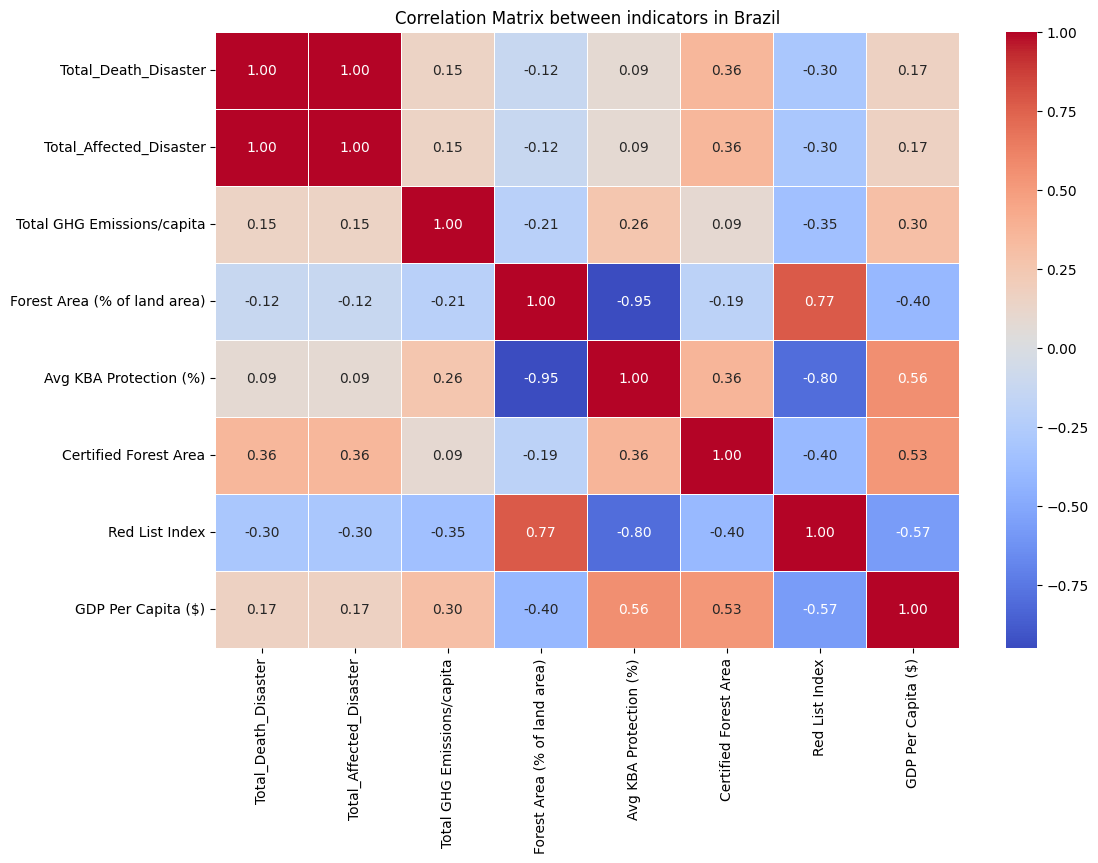

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'new_df' is your DataFrame with selected columns

# Exclude the 'Year' column for correlation calculation
correlation_data = brazil_merge_data_analysis.drop(columns=['Year'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between indicators in Brazil')
plt.show()

In [89]:
correlation_matrix

,Total_Death_Disaster,Total_Affected_Disaster,Total GHG Emissions/capita,Forest Area (% of land area),Avg KBA Protection (%),Certified Forest Area,Red List Index,GDP Per Capita ($)
Total_Death_Disaster,1.000000,1.000000,0.149474,-0.119437,0.086173,0.355650,-0.297425,0.168890
Total_Affected_Disaster,1.000000,1.000000,0.149474,-0.119437,0.086173,0.355650,-0.297425,0.168890
Total GHG Emissions/capita,0.149474,0.149474,1.000000,-0.211717,0.257822,0.091822,-0.352037,0.300101
Forest Area (% of land area),-0.119437,-0.119437,-0.211717,1.000000,-0.948427,-0.190240,0.774094,-0.402459
Avg KBA Protection (%),0.086173,0.086173,0.257822,-0.948427,1.000000,0.363090,-0.798530,0.563624
Certified Forest Area,0.355650,0.355650,0.091822,-0.190240,0.363090,1.000000,-0.399700,0.525668
Red List Index,-0.297425,-0.297425,-0.352037,0.774094,-0.798530,-0.399700,1.000000,-0.572916
GDP Per Capita ($),0.168890,0.168890,0.300101,-0.402459,0.563624,0.525668,-0.572916,1.000000


## Granger Causality P-values analysis

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

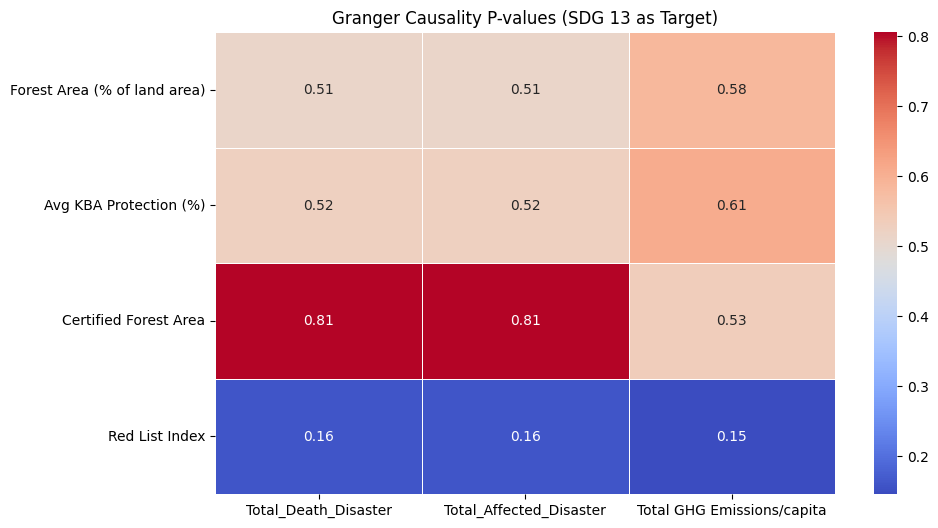

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Define the predictors and the disaster-related target variables
predictors = ['Forest Area (% of land area)',
              'Avg KBA Protection (%)', 'Certified Forest Area',
              'Red List Index']
targets = ['Total_Death_Disaster', 'Total_Affected_Disaster', 'Total GHG Emissions/capita']

# Create an empty matrix to store p-values for each predictor-target combination
p_values = np.zeros((len(predictors), len(targets)))

# Loop over each target and perform Granger Causality test for each predictor
for j, target in enumerate(targets):
    for i, predictor in enumerate(predictors):
        test_result = grangercausalitytests(brazil_merge_data_analysis[[target, predictor]], maxlag=4, verbose=False)
        p_values[i, j] = test_result[1][0]['ssr_ftest'][1]  # p-value from the F-test at lag 1

# Create a DataFrame of the p-values
p_values_df = pd.DataFrame(p_values, index=predictors, columns=targets)

# Plot the heatmap of Granger causality p-values
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Granger Causality P-values (SDG 13 as Target)')
plt.show()

# From this part on, archieve for now

# Continue from here.
- Implement this to the existing dataframe at the top (merge two dataframe together)

In [ ]:
# Group data by 'Year' and calculate the mean for each group
mean_by_year_brazil = death_by_natural_disasters_data_brazil.groupby('Year').mean()

# Reset the index to make 'Year' a regular column again
mean_by_year_brazil = mean_by_year_brazil.reset_index()

In [ ]:
# Rename columns for clarity (add "_mean" suffix)
mean_by_year_brazil = mean_by_year_brazil.rename(columns={col: f"{col}_mean" for col in mean_by_year_brazil.columns if col != 'Year'})

# Merge with original DataFrame to add new columns
death_by_natural_disasters_data_brazil = pd.merge(death_by_natural_disasters_data_brazil, mean_by_year_brazil, on='Year', how='left')

# Display updated DataFrame
death_by_natural_disasters_data_brazil

,Number of deaths from drought,Death rates from drought,Number of deaths from earthquakes,Death rates from earthquakes,Number of deaths from disasters,Death rates from disasters,Number of deaths from volcanic activity,Death rates from volcanic activity,Number of deaths from floods,Death rates from floods,...,Death rates from glacial lake outbursts_mean_mean,deaths_all_disasters_excluding_earthquakes_mean_mean,deaths_all_disasters_excluding_extreme_temperature_mean_mean,deaths_glacial_lake_outburst_flood_mean_mean,deaths_wet_mass_movement_mean_mean,deaths_rate_per_100k_all_disasters_excluding_earthquakes_mean_mean,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature_mean_mean,deaths_rate_per_100k_glacial_lake_outburst_flood_mean_mean,deaths_rate_per_100k_storm_mean_mean,deaths_rate_per_100k_wet_mass_movement_mean_mean
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,30.0,0.058193,0.0,0.0,20.0,0.039141,...,NaN,30.0,30.0,0.0,0.0,0.058193,0.058193,0.0,0.019051,0.000000
5,0.0,0.000000,0.0,0.000000,33.7,0.049443,0.0,0.0,21.2,0.030910,...,NaN,33.7,33.7,0.0,6.6,0.049443,0.049443,0.0,0.008324,0.010210
6,0.0,0.000000,0.0,0.000000,275.3,0.310075,0.0,0.0,181.8,0.204557,...,NaN,275.3,264.0,0.0,78.6,0.310075,0.297747,0.0,0.004139,0.089051
7,0.0,0.000000,0.0,0.000000,139.9,0.130792,0.0,0.0,114.2,0.106926,...,NaN,139.9,127.3,0.0,12.1,0.130792,0.119201,0.0,0.000878,0.011397
8,2.0,0.001527,0.1,0.000072,195.5,0.140306,0.0,0.0,159.8,0.115039,...,NaN,195.4,187.8,0.0,14.3,0.140234,0.135005,0.0,0.008591,0.009776
9,0.0,0.000000,0.0,0.000000,76.8,0.047188,0.0,0.0,38.6,0.023894,...,NaN,76.8,76.8,0.0,37.8,0.047188,0.047188,0.0,0.000178,0.023057


In [ ]:
# Select columns with "_mean" suffix
mean_columns = [col for col in mean_by_year_brazil.columns if col.endswith('_mean')]

# Sum the mean columns into a new column called 'Total_Mean'
mean_by_year_brazil['Total_Mean'] = mean_by_year_brazil[mean_columns].sum(axis=1)

# Merge with original DataFrame
death_by_natural_disasters_data_brazil = pd.merge(death_by_natural_disasters_data_brazil, mean_by_year_brazil[['Year', 'Total_Mean']], on='Year', how='left')

# Display updated DataFrame
death_by_natural_disasters_data_brazil

,Number of deaths from drought,Death rates from drought,Number of deaths from earthquakes,Death rates from earthquakes,Number of deaths from disasters,Death rates from disasters,Number of deaths from volcanic activity,Death rates from volcanic activity,Number of deaths from floods,Death rates from floods,...,deaths_all_disasters_excluding_extreme_temperature_mean_mean,deaths_glacial_lake_outburst_flood_mean_mean,deaths_wet_mass_movement_mean_mean,deaths_rate_per_100k_all_disasters_excluding_earthquakes_mean_mean,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature_mean_mean,deaths_rate_per_100k_glacial_lake_outburst_flood_mean_mean,deaths_rate_per_100k_storm_mean_mean,deaths_rate_per_100k_wet_mass_movement_mean_mean,Total_Mean_x,Total_Mean_y
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,30.0,0.058193,0.0,0.0,20.0,0.039141,...,30.0,0.0,0.0,0.058193,0.058193,0.0,0.019051,0.000000,120.232771,120.232771
5,0.0,0.000000,0.0,0.000000,33.7,0.049443,0.0,0.0,21.2,0.030910,...,33.7,0.0,6.6,0.049443,0.049443,0.0,0.008324,0.010210,134.997772,134.997772
6,0.0,0.000000,0.0,0.000000,275.3,0.310075,0.0,0.0,181.8,0.204557,...,264.0,0.0,78.6,0.310075,0.297747,0.0,0.004139,0.089051,1091.127973,1091.127973
7,0.0,0.000000,0.0,0.000000,139.9,0.130792,0.0,0.0,114.2,0.106926,...,127.3,0.0,12.1,0.130792,0.119201,0.0,0.000878,0.011397,547.511578,547.511578
8,2.0,0.001527,0.1,0.000072,195.5,0.140306,0.0,0.0,159.8,0.115039,...,187.8,0.0,14.3,0.140234,0.135005,0.0,0.008591,0.009776,774.755851,774.755851
9,0.0,0.000000,0.0,0.000000,76.8,0.047188,0.0,0.0,38.6,0.023894,...,76.8,0.0,37.8,0.047188,0.047188,0.0,0.000178,0.023057,307.388752,307.388752


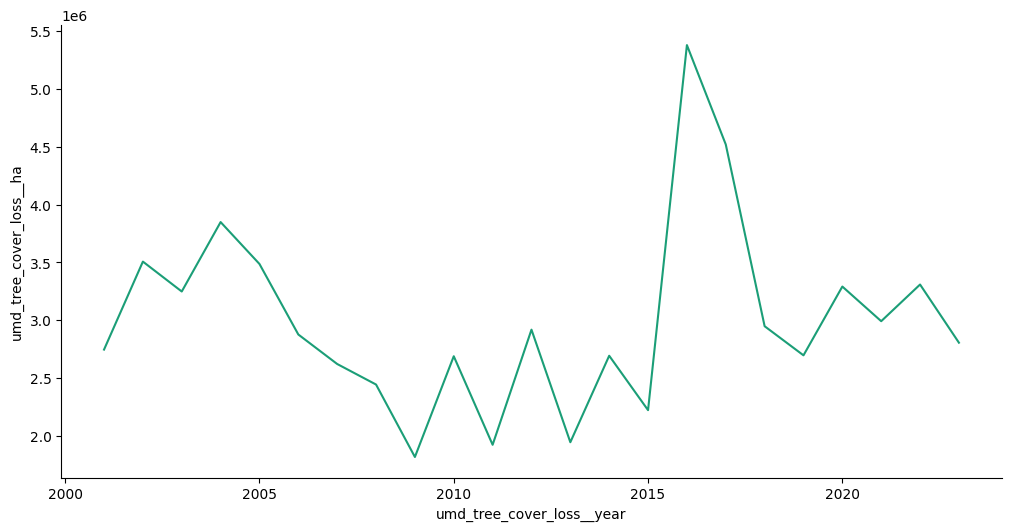

In [ ]:
# @title umd_tree_cover_loss__year vs umd_tree_cover_loss__ha

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['umd_tree_cover_loss__year']
  ys = series['umd_tree_cover_loss__ha']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('umd_tree_cover_loss__year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('umd_tree_cover_loss__year')
_ = plt.ylabel('umd_tree_cover_loss__ha')

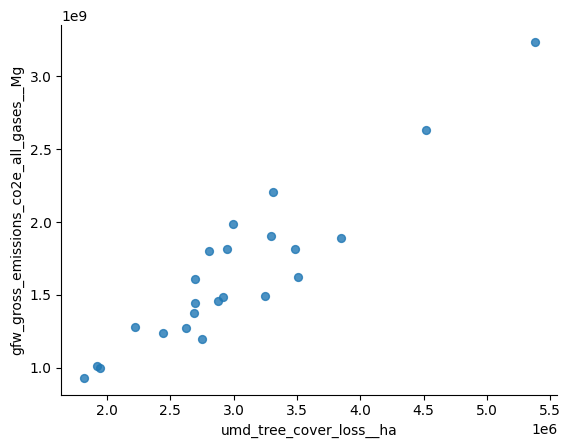

In [ ]:
# @title umd_tree_cover_loss__ha vs gfw_gross_emissions_co2e_all_gases__Mg

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='umd_tree_cover_loss__ha', y='gfw_gross_emissions_co2e_all_gases__Mg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
correlation = data['umd_tree_cover_loss__ha'].corr(data['gfw_gross_emissions_co2e_all_gases__Mg'])
print(f"The correlation between umd_tree_cover_loss__ha and gfw_gross_emissions_co2e_all_gases__Mg is: {correlation}")

The correlation between umd_tree_cover_loss__ha and gfw_gross_emissions_co2e_all_gases__Mg is: 0.9282132513335635


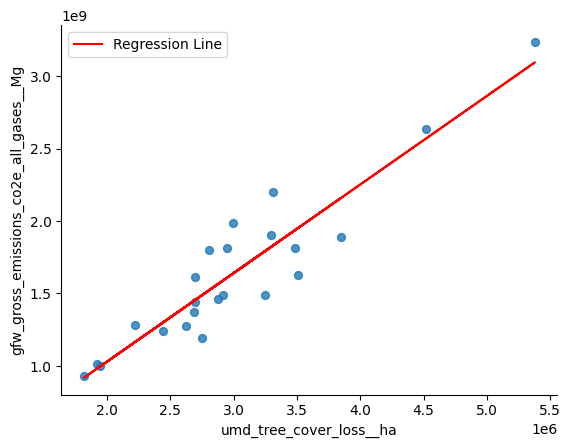

In [ ]:
# @title umd_tree_cover_loss__ha vs gfw_gross_emissions_co2e_all_gases__Mg

from matplotlib import pyplot as plt
import numpy as np

# Extract x and y data for regression
x = data['umd_tree_cover_loss__ha']
y = data['gfw_gross_emissions_co2e_all_gases__Mg']

# Calculate regression line
m, b = np.polyfit(x, y, 1)

# Create scatter plot
data.plot(kind='scatter', x='umd_tree_cover_loss__ha', y='gfw_gross_emissions_co2e_all_gases__Mg', s=32, alpha=.8)

# Plot regression line
plt.plot(x, m*x + b, color='red', label='Regression Line')

# Customize plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()  # Show legend to display regression line label
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = m * x + b  # Calculate predicted values
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.8615798399512252


## Tree cover loss in primary forest analysis

In [ ]:
primary_tree_loss = pd.read_csv('/content/treecover_loss_in_primary_forests_2001_tropics_only__ha.csv')

In [ ]:
primary_tree_loss.head()

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,BRA,2001,4.655430e+05,2.972644e+08
1,BRA,2002,1.621765e+06,9.707554e+08
2,BRA,2003,1.570576e+06,9.255933e+08
3,BRA,2004,2.016477e+06,1.236506e+09
4,BRA,2005,1.824425e+06,1.166672e+09


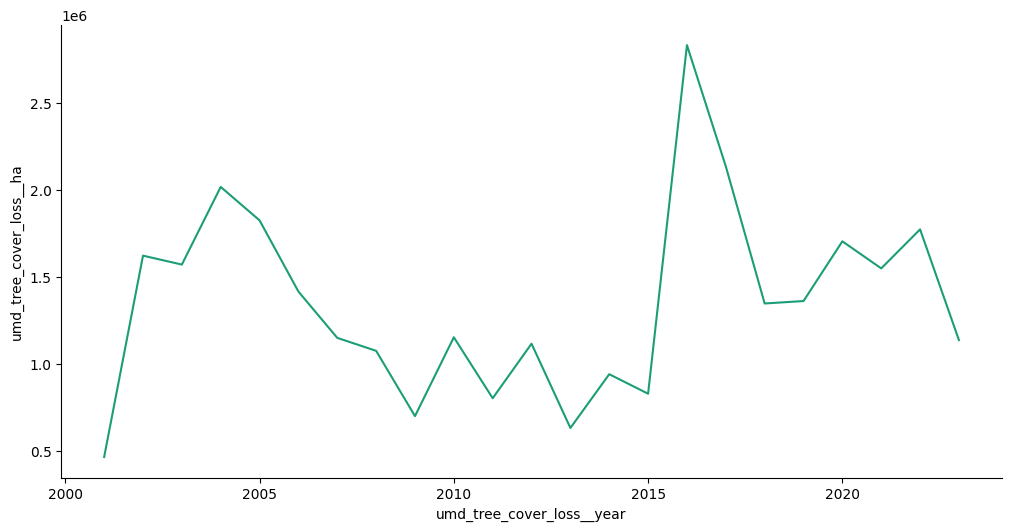

In [ ]:
# @title umd_tree_cover_loss__year vs umd_tree_cover_loss__ha

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['umd_tree_cover_loss__year']
  ys = series['umd_tree_cover_loss__ha']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = primary_tree_loss.sort_values('umd_tree_cover_loss__year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('umd_tree_cover_loss__year')
_ = plt.ylabel('umd_tree_cover_loss__ha')

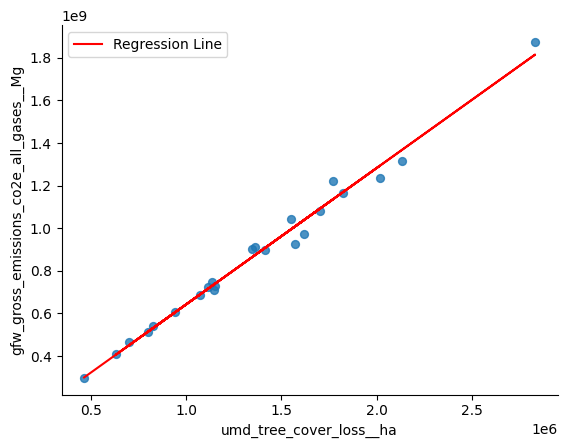

In [ ]:
# @title umd_tree_cover_loss__ha vs gfw_gross_emissions_co2e_all_gases__Mg

from matplotlib import pyplot as plt
import numpy as np

# Extract x and y data for regression
x = primary_tree_loss['umd_tree_cover_loss__ha']
y = primary_tree_loss['gfw_gross_emissions_co2e_all_gases__Mg']

# Calculate regression line using NumPy's polyfit
m, b = np.polyfit(x, y, 1)  # 1 is the degree of the polynomial (linear regression)

# Create scatter plot
primary_tree_loss.plot(kind='scatter', x='umd_tree_cover_loss__ha', y='gfw_gross_emissions_co2e_all_gases__Mg', s=32, alpha=.8)

# Plot regression line
plt.plot(x, m * x + b, color='red', label='Regression Line')

# Customize plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()  # Show legend to display regression line label
plt.show()

In [ ]:
correlation = primary_tree_loss['umd_tree_cover_loss__ha'].corr(primary_tree_loss['gfw_gross_emissions_co2e_all_gases__Mg'])
print(f"The correlation between umd_tree_cover_loss__ha and gfw_gross_emissions_co2e_all_gases__Mg is: {correlation}")

The correlation between umd_tree_cover_loss__ha and gfw_gross_emissions_co2e_all_gases__Mg is: 0.9935384767242335


In [ ]:
# Calculate predicted values using the regression equation
y_pred = m * x + b

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Print R-squared
print(f"R-squared: {r_squared}")

R-squared: 0.9871187047315109
